# Nuclei Simulation Notebook

This notebook generates a 500x500 pixel image containing simulated nuclei. We will apply a Gaussian blur to simulate the microscope's Point Spread Function (PSF) and add noise to the image.

## Import necessary libraries
We will use `numpy` for numerical operations, `scikit-image` for image processing, `scipy` for generating Gaussian noise, and `stackview` for image visualization.

In [1]:
import numpy as np
from skimage import filters, util
from scipy.ndimage import gaussian_filter
import stackview


## Generate synthetic nuclei
We will create a binary image with circle-like structures representing nuclei.

In [2]:
def create_synthetic_nuclei(image_size, num_nuclei, radius_range):
    image = np.zeros((image_size, image_size), dtype=np.float32)
    centers = np.random.randint(0, image_size, (num_nuclei, 2))
    for center in centers:
        radius = np.random.randint(*radius_range)
        rr, cc = np.ogrid[:image_size, :image_size]
        circle = (rr - center[0]) ** 2 + (cc - center[1]) ** 2 <= radius ** 2
        image[circle] = 1.0
    return image

synthetic_nuclei = create_synthetic_nuclei(500, 30, (10, 30))

## Apply Gaussian blur
This simulates the microscope's point spread function.

In [3]:
blurred_nuclei = gaussian_filter(synthetic_nuclei, sigma=3)

## Add noise to the image
We add Gaussian noise to simulate real-world conditions.

In [4]:
noisy_blurred_nuclei = util.random_noise(blurred_nuclei, mode='gaussian', mean=0, var=0.01)

## Display the result
We utilize `stackview` to visualize the simulated nuclei image.

StackViewNDArray([[0.90768621, 0.90751261, 1.        , ..., 0.        ,
                   0.        , 0.16963713],
                  [1.        , 0.78833203, 1.        , ..., 0.        ,
                   0.0042088 , 0.21430998],
                  [1.        , 0.95204539, 1.        , ..., 0.10073548,
                   0.10077104, 0.23493838],
                  ...,
                  [0.11624688, 0.        , 0.0149785 , ..., 0.        ,
                   0.        , 0.06890289],
                  [0.00592506, 0.        , 0.        , ..., 0.        ,
                   0.        , 0.        ],
                  [0.02870144, 0.        , 0.20480714, ..., 0.14160122,
                   0.1104028 , 0.15832301]])
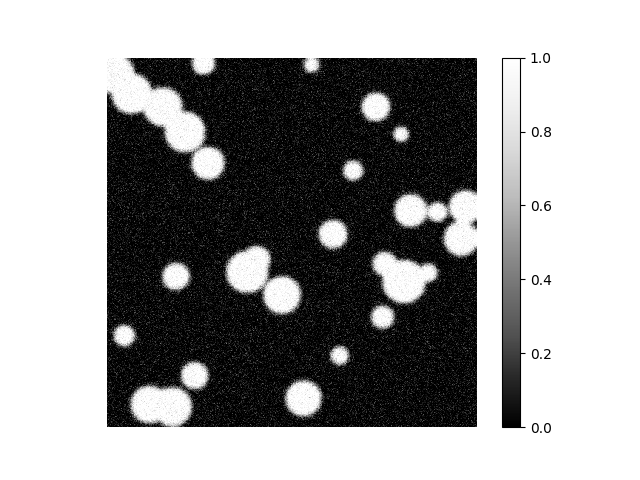
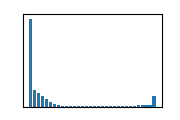

In [5]:
stackview.insight(noisy_blurred_nuclei)

## Save the image
We save the resulting image as a `.png` file.

In [6]:
from skimage.io import imsave

# Convert the image to uint8
output_image = (noisy_blurred_nuclei * 255).astype(np.uint8)
imsave('simulated_nuclei.png', output_image)